In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r'H:\My Drive\01.UIT\HK6\ShopeeAnalytics.com (8).csv')



In [4]:
data.head()

,Ảnh,Tên sản phẩm,Link sản phẩm,Giá,Bán,Doanh thu,Hành động
0,NaN,Set 2 Kẹp tóc len giáng sinh noel cho bé KT11,https://shopee.vn/SA-i.365283.4365189429,16.00,1.423,22.768.000,Xem Chi tiết
1,NaN,"Kẹp tóc dệt len hình hoa quả, kẹp tóc handmade",https://shopee.vn/SA-i.10912353.4212641674,4.50,2.498,11.241.000,Xem Chi tiết
2,NaN,Set 9 kẹp tóc len hoạt hình dễ thương cho bé g...,https://shopee.vn/SA-i.21764863.22416291099,55.00,151.000,8.305.000,Xem Chi tiết
3,NaN,【coffeemate】⚡Kẹp Tóc Len Dễ Thương Dành Cho Nữ,https://shopee.vn/SA-i.928334223.20771259720,1.39,5.602,7.786.780,Xem Chi tiết
4,NaN,Kẹp tóc len handmade LionChinzilla GeminiFourt...,https://shopee.vn/SA-i.169259625.23353659594,20.00,380.000,7.600.000,Xem Chi tiết


In [5]:
data.describe()

,Ảnh,Giá,Bán
count,0.0,100.000000,100.000000
mean,NaN,17.647730,93.825230
std,NaN,14.400806,149.944477
min,NaN,1.390000,1.000000
25%,NaN,9.000000,4.000000
50%,NaN,13.655000,24.500000
75%,NaN,22.125000,113.250000
max,NaN,100.000000,817.000000


In [6]:
data['Giá'] = pd.to_numeric(data['Giá'], errors='coerce')

In [7]:
data['Bán'] = pd.to_numeric(data['Bán'], errors='coerce')

In [8]:
def number_cluster(price):
    if price <= 10:
        return "0-10"
    elif price > 10 and price <= 20:
        return "10-20"
    elif price > 20 and price <= 50:
        return "20-50"
    elif price > 50:
        return ">50"
    
data['Cụm giá'] = data['Giá'].apply(number_cluster)

In [9]:
cluter_data = data.groupby('Cụm giá').agg({'Bán':'sum','Doanh thu':'sum' }).reset_index()

In [10]:
cluter_data.head()

,Cụm giá,Bán,Doanh thu
0,0-10,4734.100,11.241.0007.786.7806.580.0004.902.0004.737.600...
1,10-20,3562.423,22.768.0007.600.0005.400.0004.580.0003.912.000...
2,20-50,895.000,6.193.8004.500.0003.475.0002.418.0002.366.0001...
3,>50,191.000,8.305.0001.980.000400.000165.000


In [11]:
total_product_sold = cluter_data['Bán'].sum()
cluter_data['%Bán'] = (cluter_data['Bán']/total_product_sold)*100

In [12]:
cluter_data.head()

,Cụm giá,Bán,Doanh thu,%Bán
0,0-10,4734.100,11.241.0007.786.7806.580.0004.902.0004.737.600...,50.456578
1,10-20,3562.423,22.768.0007.600.0005.400.0004.580.0003.912.000...,37.968711
2,20-50,895.000,6.193.8004.500.0003.475.0002.418.0002.366.0001...,9.539012
3,>50,191.000,8.305.0001.980.000400.000165.000,2.035700


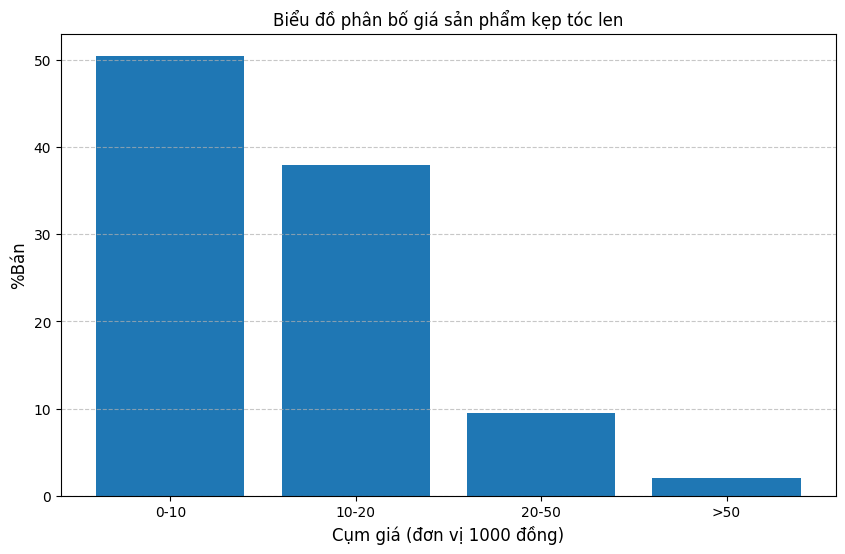

In [13]:
# vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(cluter_data['Cụm giá'], cluter_data['%Bán'])
plt.title('Biểu đồ phân bố giá sản phẩm kẹp tóc len')
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
data_hoa = data = pd.read_csv(r'H:\My Drive\01.UIT\HK6\hoa_len.csv')

In [15]:
data_hoa.head()
name_of_bar = "Biểu đồ phân bố giá sản phẩm hoa trang trí bằng len"


In [16]:
data_hoa.describe()

,Ảnh,Giá,Bán,Doanh thu
count,0.0,98.000000,98.000000,9.800000e+01
mean,NaN,78.620337,312.642857,7.934592e+06
std,NaN,73.333487,1230.532206,2.714776e+07
min,NaN,4.800000,1.000000,8.911000e+03
25%,NaN,26.925000,3.000000,1.862500e+05
50%,NaN,55.000000,8.000000,7.000000e+05
75%,NaN,96.500000,74.500000,2.395250e+06
max,NaN,300.000000,9130.000000,2.332715e+08


In [17]:
def number_cluster_hoa(price):
    if price <= 20:
        return "0-10"
    elif price > 20 and price <= 50:
        return "20-50"
    elif price > 50:
        return ">50"

In [18]:
def model_analyst_shopee(data,name_of_bar):
    data['Giá'] = pd.to_numeric(data['Giá'], errors='coerce')
    data['Bán'] = pd.to_numeric(data['Bán'], errors='coerce')
    data['Cụm giá'] = data['Giá'].apply(number_cluster_hoa)
    cluter_data = data.groupby('Cụm giá').agg({'Bán':'sum','Doanh thu':'sum' }).reset_index()
    total_product_sold = cluter_data['Bán'].sum()
    cluter_data['%Bán'] = (cluter_data['Bán']/total_product_sold)*100
    # vẽ biểu đồ
    plt.figure(figsize=(10,6))
    plt.bar(cluter_data['Cụm giá'], cluter_data['%Bán'])
    plt.title(name_of_bar)
    plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
    plt.ylabel('%Bán', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(cluter_data['Cụm giá'], cluter_data['Bán'], marker='o', color='red', label='Số lượng Bán')
    plt.title(name_of_bar, fontsize=14)
    plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
    plt.ylabel('Số lượng Bán', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

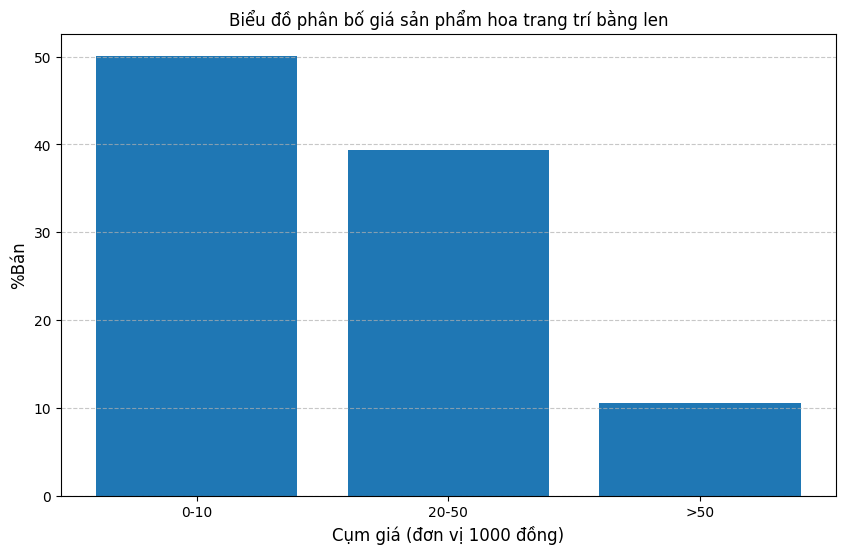

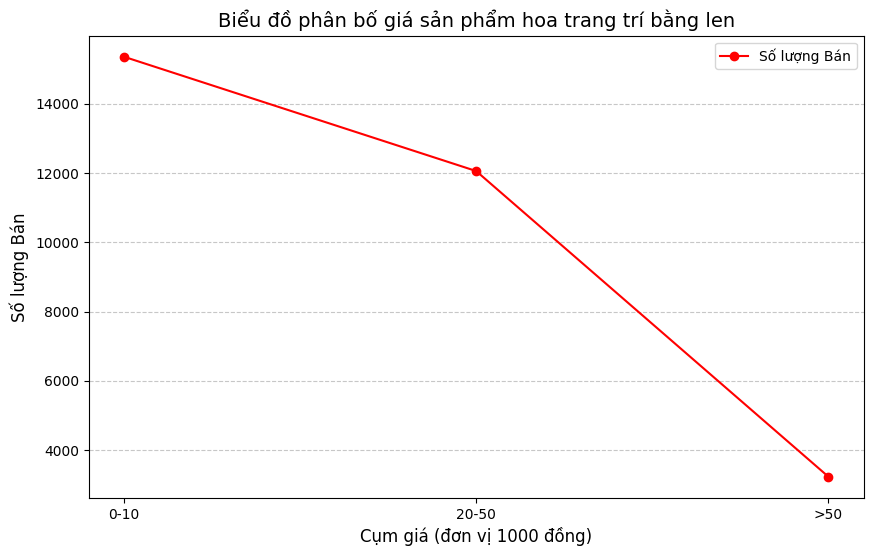

In [19]:
name_of_bar = "Biểu đồ phân bố giá sản phẩm hoa trang trí bằng len"
model_analyst_shopee(data_hoa,name_of_bar)

In [20]:

data_moc_khoa = pd.read_csv(r'H:\My Drive\01.UIT\HK6\moc_khoa.csv')
mockhoa = " Biểu đồ phân bố giá sản phẩm móc khóa"

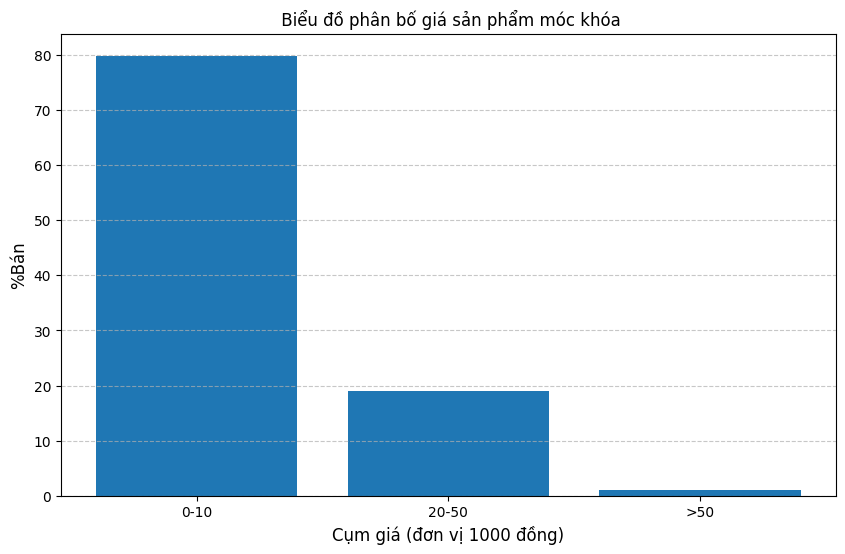

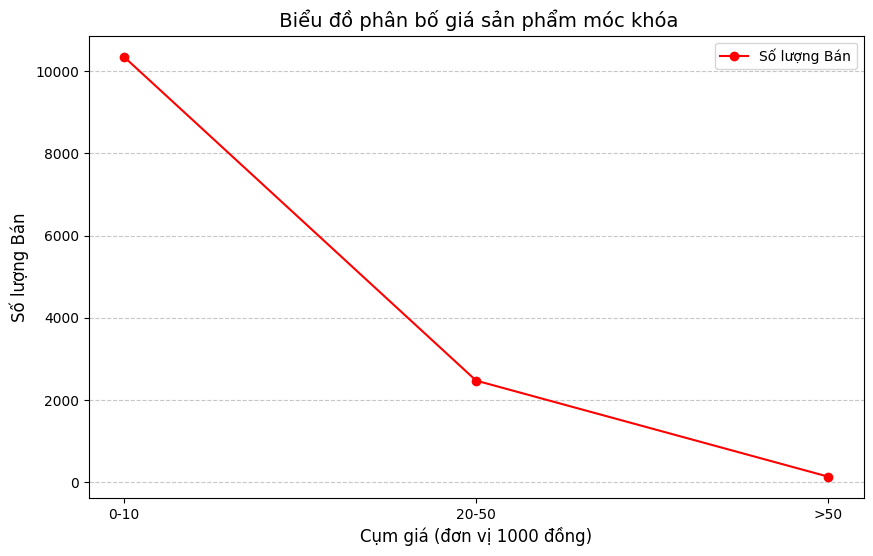

In [21]:
model_analyst_shopee(data_moc_khoa,mockhoa)

1031972126.0


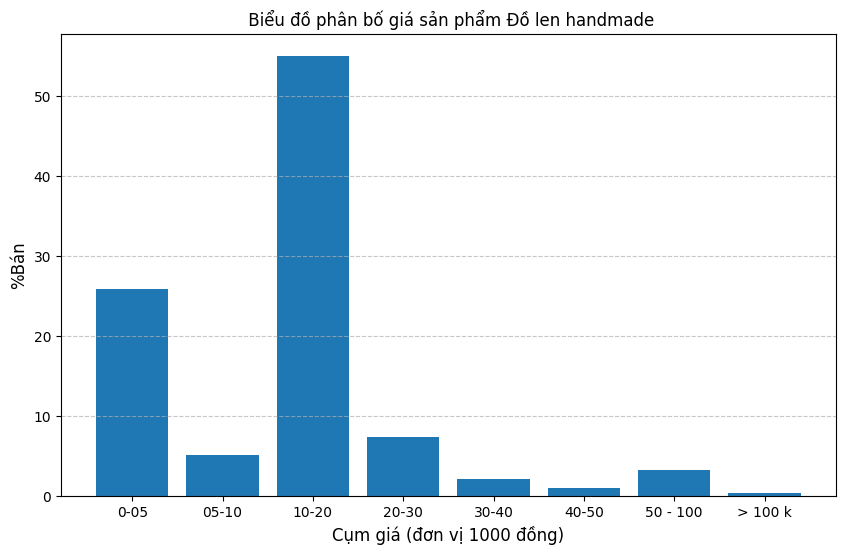

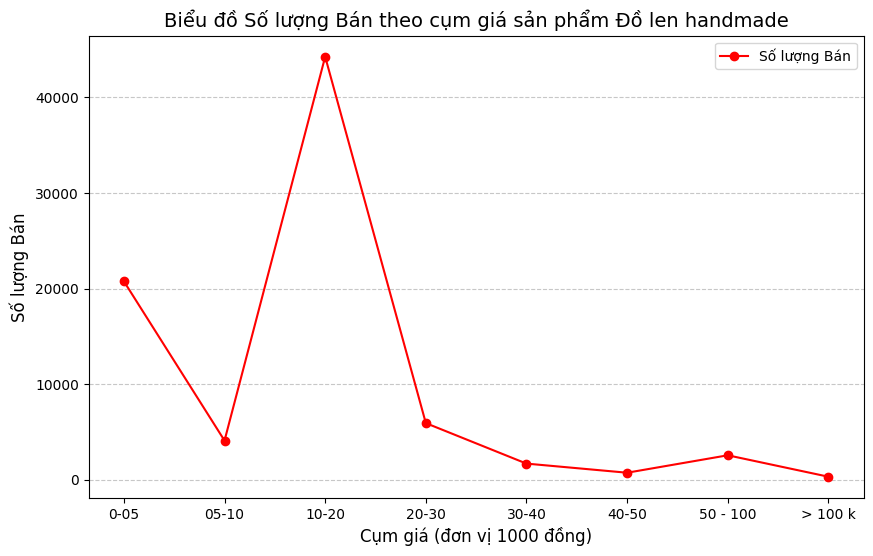

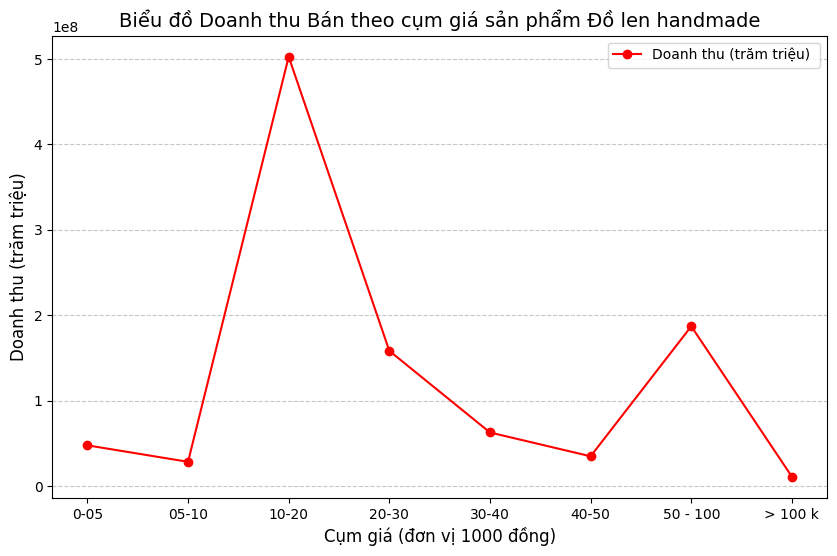

In [3]:
def number_cluster_len_hand_make(price):
    if price <5:
        return "0-05"
    elif price > 5 and price <= 10:
        return "05-10"
    elif price > 10 and price <= 20:
        return "10-20"
    elif price > 20 and price <= 30:
        return "20-30"
    elif price > 30 and price <= 40:
        return "30-40"
    elif price > 40 and price <= 50:
        return "40-50"
    elif price > 50 and price <= 100:
        return "50 - 100"
    else:
        return "> 100 k"

data_dolen_handmade = pd.read_csv(r'G:\My Drive\01.UIT\HK6\dolenhandmade.csv')
dolen_handmade = " Biểu đồ phân bố giá sản phẩm Đồ len handmade"

data_dolen_handmade['Giá'] = pd.to_numeric(data_dolen_handmade['Giá'], errors='coerce')
data_dolen_handmade['Bán'] = pd.to_numeric(data_dolen_handmade['Bán'], errors='coerce')
data_dolen_handmade['Doanh thu'] = pd.to_numeric(data_dolen_handmade['Doanh thu'],errors='coerce')
data_dolen_handmade['Cụm giá'] = data_dolen_handmade['Giá'].apply(number_cluster_len_hand_make)
cluter_data = data_dolen_handmade.groupby('Cụm giá').agg({'Bán':'sum','Doanh thu':'sum' }).reset_index()
total_product_sold = cluter_data['Bán'].sum()
#tổng sản phẩm bán / tổng sản phẩm
cluter_data['%Bán'] = (cluter_data['Bán']/total_product_sold)*100
# vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(cluter_data['Cụm giá'], cluter_data['%Bán'])

print(data_dolen_handmade['Doanh thu'].sum())

plt.title(dolen_handmade)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(cluter_data['Cụm giá'], cluter_data['Bán'], marker='o', color='red', label='Số lượng Bán')
plt.title("Biểu đồ Số lượng Bán theo cụm giá sản phẩm Đồ len handmade", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Số lượng Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluter_data['Cụm giá'], cluter_data['Doanh thu'], marker='o', color='red', label='Doanh thu (trăm triệu) ')
plt.title("Biểu đồ Doanh thu Bán theo cụm giá sản phẩm Đồ len handmade", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Doanh thu (trăm triệu)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()






In [23]:
filtered_data = data[data['Giá'] <= 30]

# Save the filtered data to a CSV file
filtered_file_path = r'H:\My Drive\01.UIT\HK6\filtered_products_below_30.csv'
filtered_data.to_csv(filtered_file_path, index=False)

filtered_file_path

'H:\\My Drive\\01.UIT\\HK6\\filtered_products_below_30.csv'

In [24]:
# phân loại nghành hàng qua các thuật toán machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import numpy as np

# Example industry categories and product names for training
example_data = pd.DataFrame({
    'Tên sản phẩm': [
        'kim chỉ may vá', 'len sợi đan áo', 'khóa kéo quần áo',
        'móc khóa len', 'thú bông len', 'bó hoa len',
        'áo len handmade', 'vải len nguyên liệu',
        'gấu bông nhỏ', 'dụng cụ may vá'
    ],
    'Ngành hàng': [
        'Công cụ, dụng cụ, nguyên vật liệu', 'Công cụ, dụng cụ, nguyên vật liệu',
        'Công cụ, dụng cụ, nguyên vật liệu', 'Hàng thủ công handmade: móc khóa',
        'Hàng thủ công gấu bông, hoa', 'Hàng thủ công gấu bông, hoa',
        'Hàng thủ công quần áo', 'Công cụ, dụng cụ, nguyên vật liệu',
        'Hàng thủ công gấu bông, hoa', 'Công cụ, dụng cụ, nguyên vật liệu'
    ]
})

# Preparing training data
X_train = example_data['Tên sản phẩm']
y_train = example_data['Ngành hàng']

# Building a text classification pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Fit the model
model.fit(X_train, y_train)

# Predict industry categories for the dataset
data['Ngành hàng'] = model.predict(data['Tên sản phẩm'])

# Filter data by price clusters and group by industry
grouped_data = data.groupby(['Ngành hàng', 'Cụm giá']).agg({
    'Bán': 'sum',
    'Tên sản phẩm': 'count'
}).rename(columns={'Tên sản phẩm': 'Số lượng sản phẩm'}).reset_index()


output_file_path = r'H:\My Drive\01.UIT\HK6\phan_tich_nganh_hang_muc_gia.csv'
grouped_data.to_csv(output_file_path, index=False)

output_file_path

'H:\\My Drive\\01.UIT\\HK6\\phan_tich_nganh_hang_muc_gia.csv'

In [25]:
data_keptoc_handmade = pd.read_csv(r'H:\My Drive\01.UIT\HK6\Kep_toc_hand_made.csv')
keptoc_handmade = " Biểu đồ phân bố giá sản phẩm kẹp tóc len"


In [26]:
data_keptoc_handmade.describe()

,Ảnh,Giá,Bán
count,0.0,100.000000,100.000000
mean,NaN,17.647730,188.960000
std,NaN,14.400806,629.115764
min,NaN,1.390000,1.000000
25%,NaN,9.000000,5.000000
50%,NaN,13.655000,29.000000
75%,NaN,22.125000,139.500000
max,NaN,100.000000,5602.000000


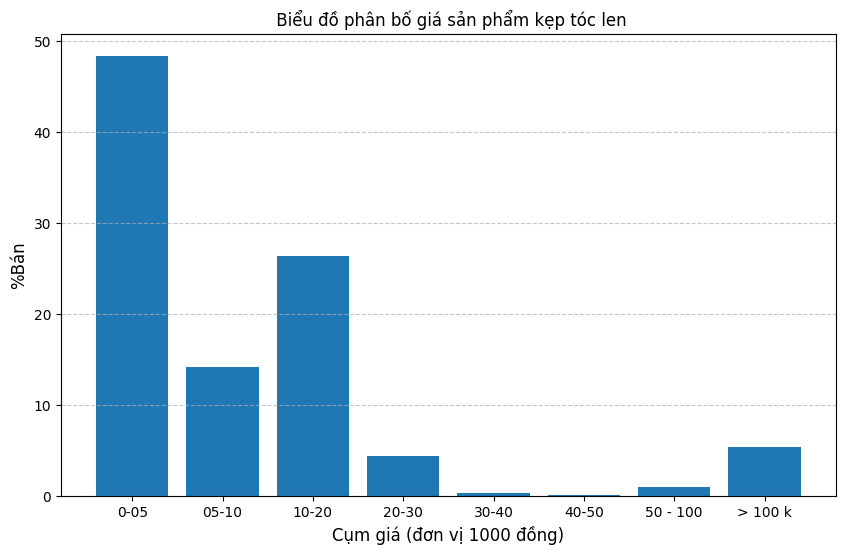

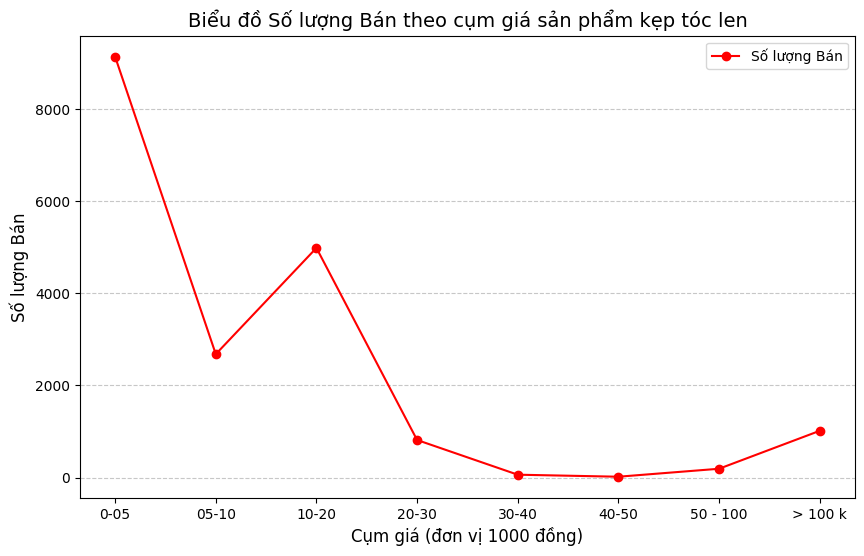

tổng đơn hàng được bán ra 18896


In [41]:

data_keptoc_handmade['Giá'] = pd.to_numeric(data_keptoc_handmade['Giá'], errors='coerce')
data_keptoc_handmade['Bán'] = pd.to_numeric(data_keptoc_handmade['Bán'], errors='coerce')
#data_keptoc_handmade['Doanh thu'] = pd.to_numeric(data_keptoc_handmade['Doanh thu'],errors='coerce')
data_keptoc_handmade['Cụm giá'] = data_keptoc_handmade['Giá'].apply(number_cluster_len_hand_make)
cluter_data_2 = data_keptoc_handmade.groupby('Cụm giá').agg({'Bán':'sum'}).reset_index()
total_product_sold = cluter_data_2['Bán'].sum()
#tổng sản phẩm bán / tổng sản phẩm
cluter_data_2['%Bán'] = (cluter_data_2['Bán']/total_product_sold)*100
# vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(cluter_data_2['Cụm giá'], cluter_data_2['%Bán'])



plt.title(keptoc_handmade)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(cluter_data_2['Cụm giá'], cluter_data_2['Bán'], marker='o', color='red', label='Số lượng Bán')
plt.title("Biểu đồ Số lượng Bán theo cụm giá sản phẩm kẹp tóc len", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Số lượng Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("tổng đơn hàng được bán ra", data_keptoc_handmade["Bán"].sum())




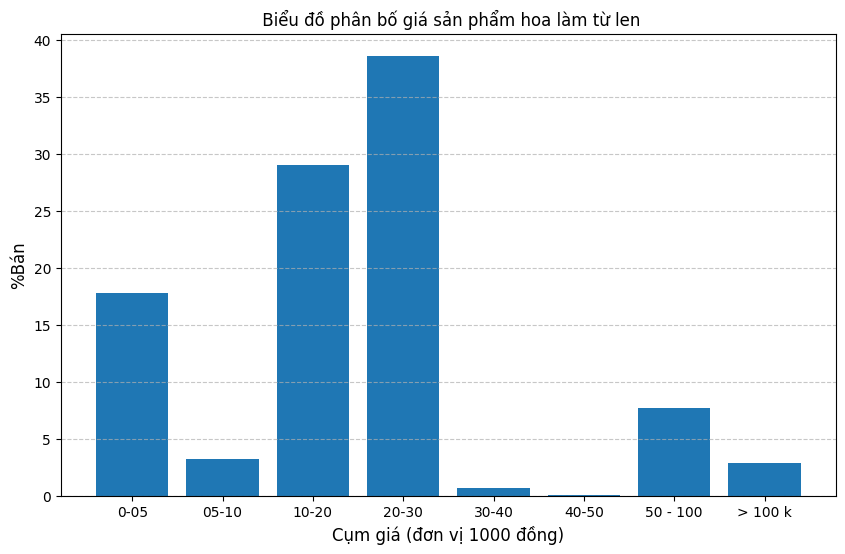

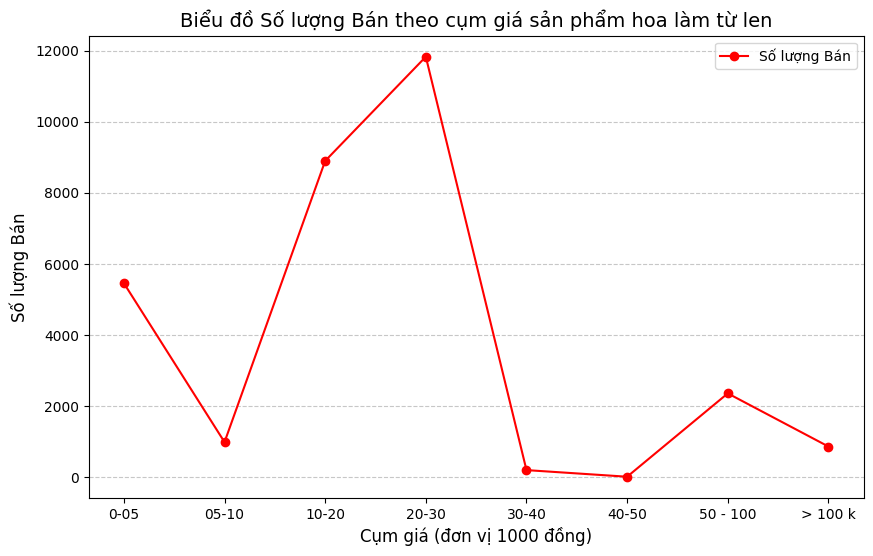

 Tổng đơn hàng được bán ra 30639


In [40]:
data_hoa_handmade = pd.read_csv(r'H:\My Drive\01.UIT\HK6\hoa_len.csv')
hoa_len_handmade = " Biểu đồ phân bố giá sản phẩm hoa làm từ len"

data_hoa_handmade['Giá'] = pd.to_numeric(data_hoa_handmade['Giá'], errors='coerce')
data_hoa_handmade['Bán'] = pd.to_numeric(data_hoa_handmade['Bán'], errors='coerce')
#data_keptoc_handmade['Doanh thu'] = pd.to_numeric(data_keptoc_handmade['Doanh thu'],errors='coerce')
data_hoa_handmade['Cụm giá'] = data_hoa_handmade['Giá'].apply(number_cluster_len_hand_make)
cluter_data_3 = data_hoa_handmade.groupby('Cụm giá').agg({'Bán':'sum'}).reset_index()
total_product_sold = cluter_data_3['Bán'].sum()
#tổng sản phẩm bán / tổng sản phẩm
cluter_data_3['%Bán'] = (cluter_data_3['Bán']/total_product_sold)*100
# vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(cluter_data_3['Cụm giá'], cluter_data_3['%Bán'])



plt.title(hoa_len_handmade)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(cluter_data_3['Cụm giá'], cluter_data_3['Bán'], marker='o', color='red', label='Số lượng Bán')
plt.title("Biểu đồ Số lượng Bán theo cụm giá sản phẩm hoa làm từ len", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Số lượng Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
print(" Tổng đơn hàng được bán ra", data_hoa_handmade["Bán"].sum())

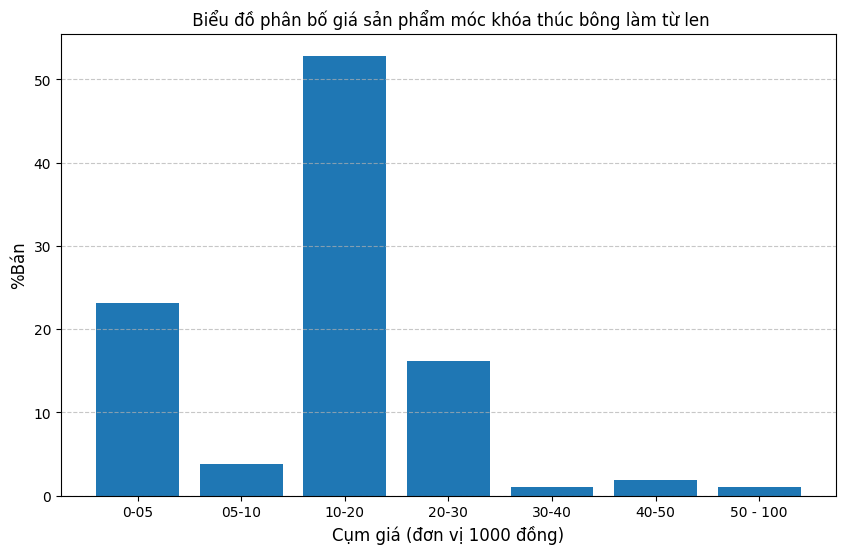

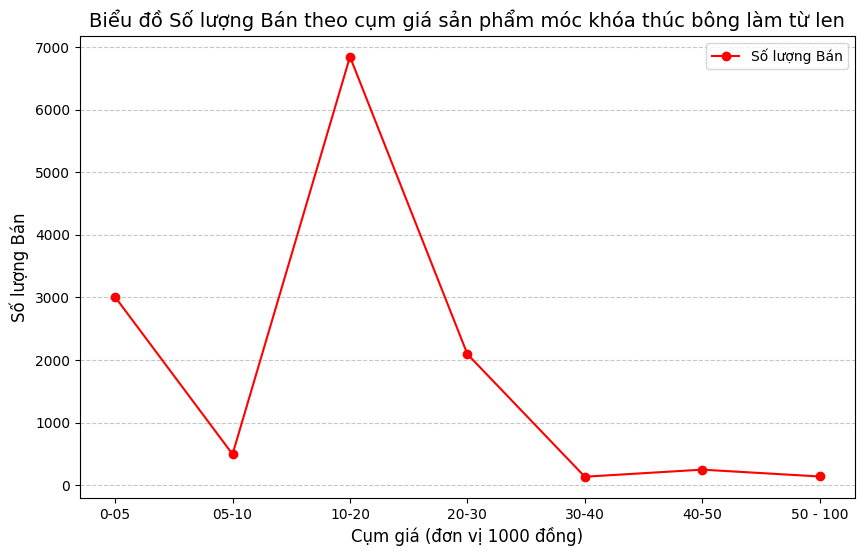

In [36]:
data_mockhoa_handmade = pd.read_csv(r'H:\My Drive\01.UIT\HK6\moc_khoa.csv')
kep_moc_khoa_handmade = " Biểu đồ phân bố giá sản phẩm móc khóa thúc bông làm từ len"

data_mockhoa_handmade['Giá'] = pd.to_numeric(data_mockhoa_handmade['Giá'], errors='coerce')
data_mockhoa_handmade['Bán'] = pd.to_numeric(data_mockhoa_handmade['Bán'], errors='coerce')
data_mockhoa_handmade['Doanh thu'] = pd.to_numeric(data_mockhoa_handmade['Doanh thu'], errors='coerce')
data_mockhoa_handmade['Cụm giá'] = data_mockhoa_handmade['Giá'].apply(number_cluster_len_hand_make)
cluter_data_4 = data_mockhoa_handmade.groupby('Cụm giá').agg({'Bán': 'sum'}).reset_index()
total_product_sold = cluter_data_4['Bán'].sum()
#tổng sản phẩm bán / tổng sản phẩm
cluter_data_4['%Bán'] = (cluter_data_4['Bán'] / total_product_sold) * 100
# vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(cluter_data_4['Cụm giá'], cluter_data_4['%Bán'])

plt.title(kep_moc_khoa_handmade)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluter_data_4['Cụm giá'], cluter_data_4['Bán'], marker='o', color='red', label='Số lượng Bán')
plt.title("Biểu đồ Số lượng Bán theo cụm giá sản phẩm móc khóa thúc bông làm từ len", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Số lượng Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [38]:
print("Tổng đơn hàng móc khóa bán", data_moc_khoa["Bán"].sum())

Tổng đơn hàng móc khóa bán 12959


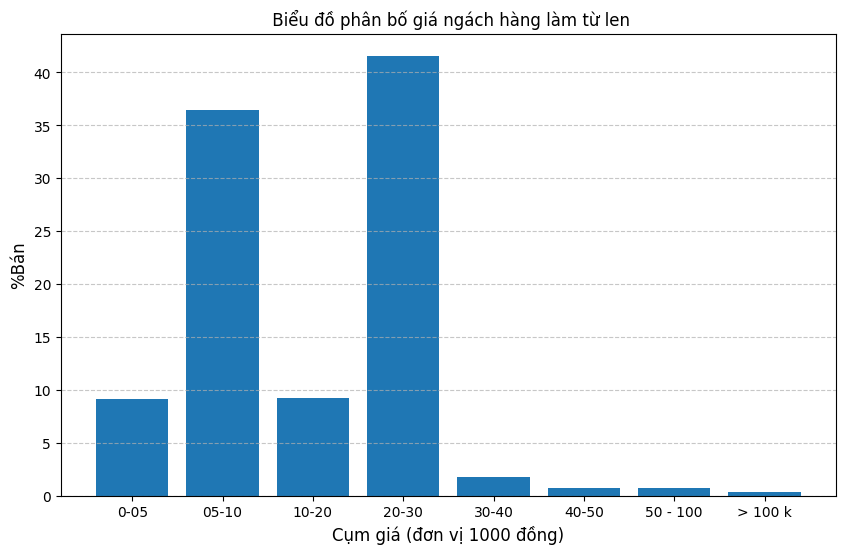

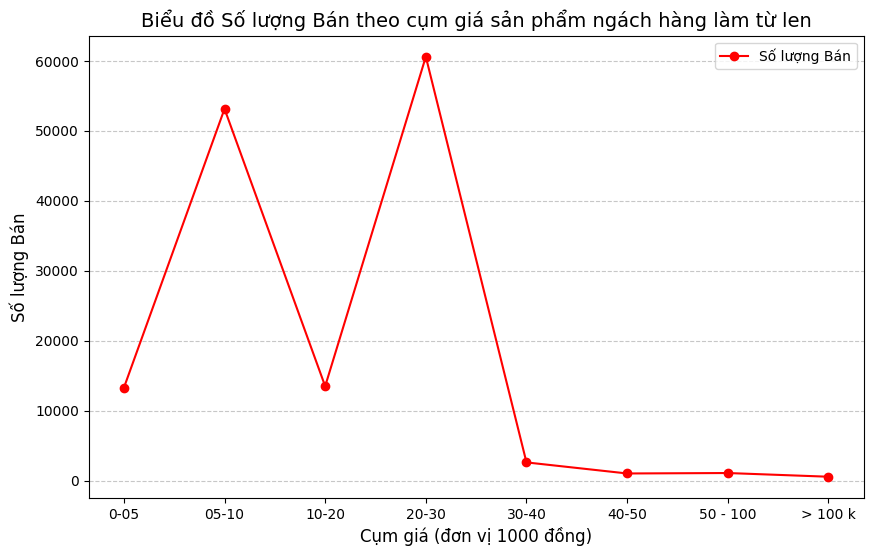

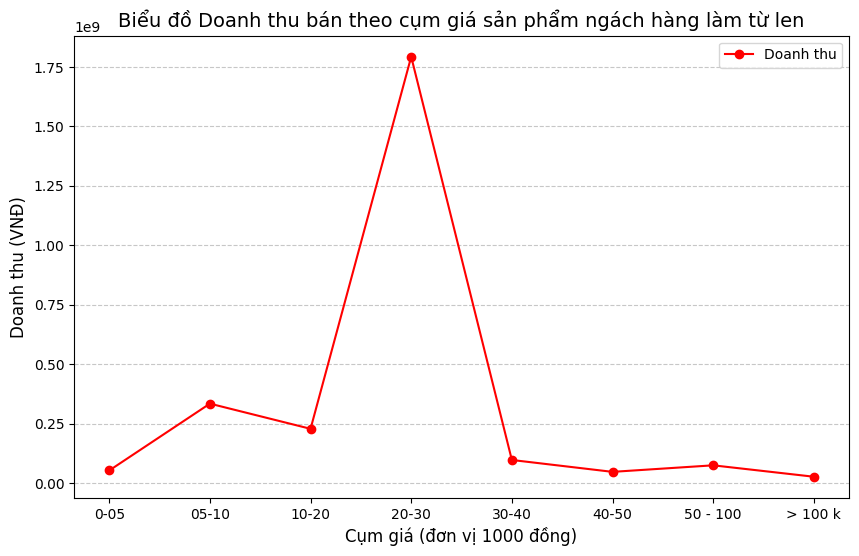

In [16]:
data_3_ngachhang_handmade = pd.read_csv(r'G:\My Drive\01.UIT\HK6\tong_thi_phan_3_san_pham.csv')
ngachhang_handmade = " Biểu đồ phân bố giá ngách hàng làm từ len"

data_3_ngachhang_handmade['Giá'] = pd.to_numeric(data_3_ngachhang_handmade['Giá'], errors='coerce')
data_3_ngachhang_handmade['Bán'] = pd.to_numeric(data_3_ngachhang_handmade['Bán'], errors='coerce')
data_3_ngachhang_handmade.columns = data_3_ngachhang_handmade.columns.str.strip()
data_3_ngachhang_handmade['Doanh thu'] = pd.to_numeric(data_3_ngachhang_handmade['Doanh thu'], errors='coerce')
data_3_ngachhang_handmade['Cụm giá'] = data_3_ngachhang_handmade['Giá'].apply(number_cluster_len_hand_make)
cluter_data_5 = data_3_ngachhang_handmade.groupby('Cụm giá').agg({'Bán': 'sum','Doanh thu':'sum'}).reset_index()

total_product_sold = cluter_data_5['Bán'].sum()
#tổng sản phẩm bán / tổng sản phẩm
cluter_data_5['%Bán'] = (cluter_data_5['Bán'] / total_product_sold) * 100
# vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(cluter_data_5['Cụm giá'], cluter_data_5['%Bán'])

plt.title(ngachhang_handmade)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluter_data_5['Cụm giá'], cluter_data_5['Bán'], marker='o', color='red', label='Số lượng Bán')
plt.title("Biểu đồ Số lượng Bán theo cụm giá sản phẩm ngách hàng làm từ len", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Số lượng Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluter_data_5['Cụm giá'], cluter_data_5['Doanh thu'], marker='o', color='red', label='Doanh thu')
plt.title("Biểu đồ Doanh thu bán theo cụm giá sản phẩm ngách hàng làm từ len", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Doanh thu (VNĐ)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [6]:
    # Phân tích lại 3 bộ giá trị mới

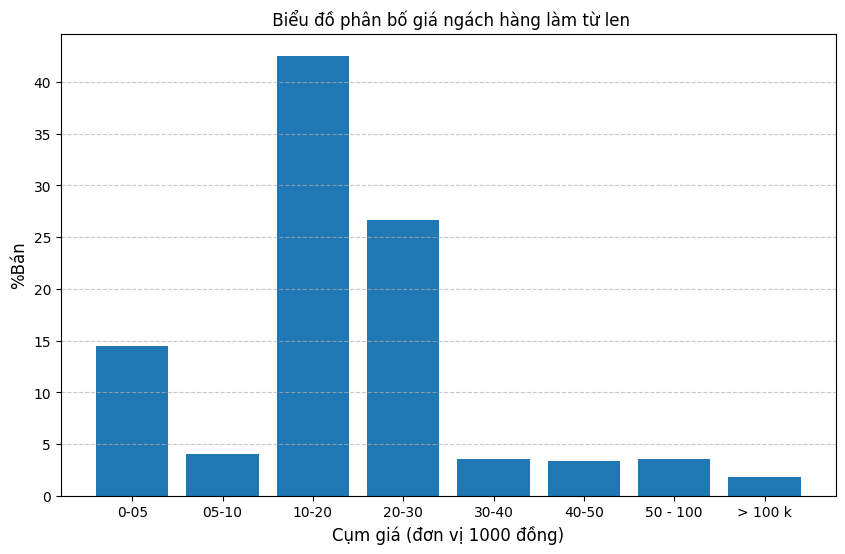

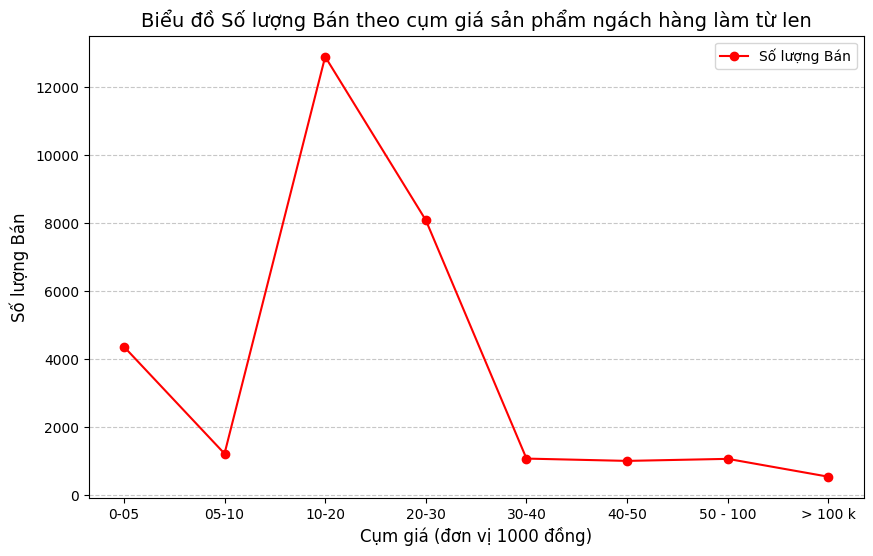

In [8]:
data_3_ngachhang_handmade_clean = pd.read_csv(r'G:\My Drive\01.UIT\HK6\tong_thi_phan_3_san_pham_clean.csv')
ngachhang_handmade = " Biểu đồ phân bố giá ngách hàng làm từ len"

data_3_ngachhang_handmade_clean['Giá'] = pd.to_numeric(data_3_ngachhang_handmade_clean['Giá'], errors='coerce')
data_3_ngachhang_handmade_clean['Bán'] = pd.to_numeric(data_3_ngachhang_handmade_clean['Bán'], errors='coerce')
data_3_ngachhang_handmade_clean['Doanh thu'] = pd.to_numeric(data_3_ngachhang_handmade_clean['Doanh thu'], errors='coerce')
data_3_ngachhang_handmade_clean['Cụm giá'] = data_3_ngachhang_handmade_clean['Giá'].apply(number_cluster_len_hand_make)
cluter_data_4 = data_3_ngachhang_handmade_clean.groupby('Cụm giá').agg({'Bán': 'sum'}).reset_index()
total_product_sold = cluter_data_4['Bán'].sum()
#tổng sản phẩm bán / tổng sản phẩm
cluter_data_4['%Bán'] = (cluter_data_4['Bán'] / total_product_sold) * 100
# vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(cluter_data_4['Cụm giá'], cluter_data_4['%Bán'])

plt.title(ngachhang_handmade)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('%Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluter_data_4['Cụm giá'], cluter_data_4['Bán'], marker='o', color='red', label='Số lượng Bán')
plt.title("Biểu đồ Số lượng Bán theo cụm giá sản phẩm ngách hàng làm từ len", fontsize=14)
plt.xlabel('Cụm giá (đơn vị 1000 đồng)', fontsize=12)
plt.ylabel('Số lượng Bán', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()